In [1]:
using DataFrames, CSV
using StatsPlots

In [16]:
files = filter(x->endswith(x, ".csv"), readdir())

1-element Vector{String}:
 "oneSided_unpooled_0.025.csv"

In [17]:
d = Dict()
for file in files
    d[file] = DataFrame(CSV.File(file))
end

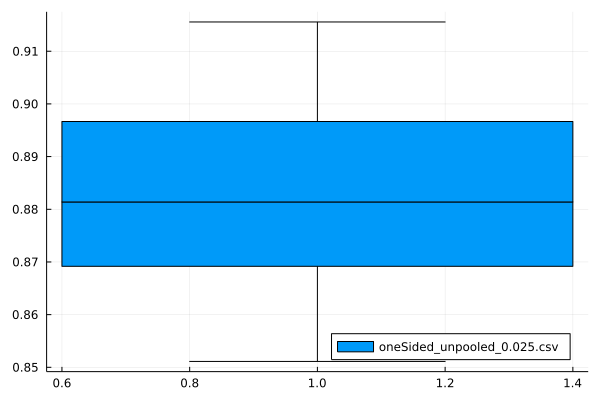

In [19]:
boxplots = boxplot([df.prob for (_, df) in d], label=hcat(files...), legend = :bottomright)

In [8]:
savefig(boxplots,"boxplots.png")

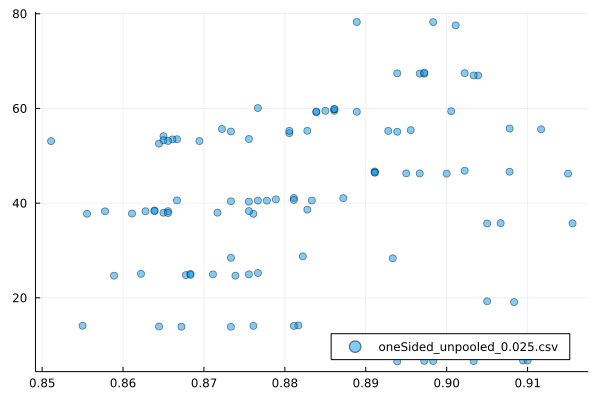

In [21]:
scatterPlot = scatter([(df.prob, df.width) for (_, df) in d], label=hcat(files...),
              legend = :bottomright, markeralpha = 0.5)

In [23]:
savefig(scatterPlot,"scatter.png")